 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
csvpath = Path('../Resources/whale_returns.csv')
whale_daily_returns = pd.read_csv(csvpath, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_daily_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_daily_returns = whale_daily_returns.dropna()
whale_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
csvpath = Path('../Resources/algo_returns.csv')
algo_daily_returns = pd.read_csv(csvpath, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_daily_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_daily_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_daily_returns = algo_daily_returns.dropna()
algo_daily_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
csvpath = Path('../Resources/sp500_history.csv')
sp500_df = pd.read_csv(csvpath)
sp500_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [9]:
# Check Data Types
sp500_df.dtypes

Date     object
Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_df.set_index(pd.to_datetime(sp500_df['Date'], infer_datetime_format=True), inplace=True)
sp500_df.head()

,Date,Close
Date,,
2019-04-23,23-Apr-19,$2933.68
2019-04-22,22-Apr-19,$2907.97
2019-04-18,18-Apr-19,$2905.03
2019-04-17,17-Apr-19,$2900.45
2019-04-16,16-Apr-19,$2907.06


In [11]:
sp500_df['Close'] = sp500_df['Close'].str.replace('$','').astype('float')

/Users/apexa.patel/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [12]:
sp500_df.drop(columns=['Date'], inplace=True)
sp500_df.dtypes

Close    float64
dtype: object

In [13]:
sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [14]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [15]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna()
sp500_daily_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns={'Close':'SP500'}, inplace=True)
sp500_daily_returns.head()

,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
returns = pd.concat([whale_daily_returns, algo_daily_returns, sp500_daily_returns], axis='columns', join='inner')
returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns Of All Portfolios'}, xlabel='Date'>

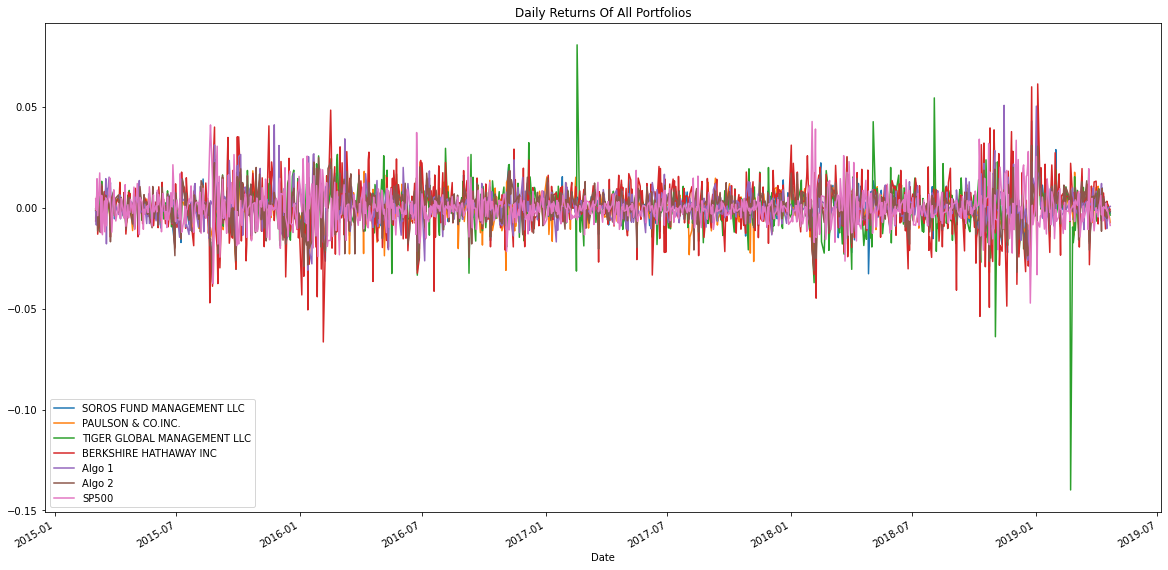

In [18]:
# Plot daily returns of all portfolios
returns.plot(figsize=(20,10), title='Daily Returns Of All Portfolios')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns Of All Portfolios'}, xlabel='Date'>

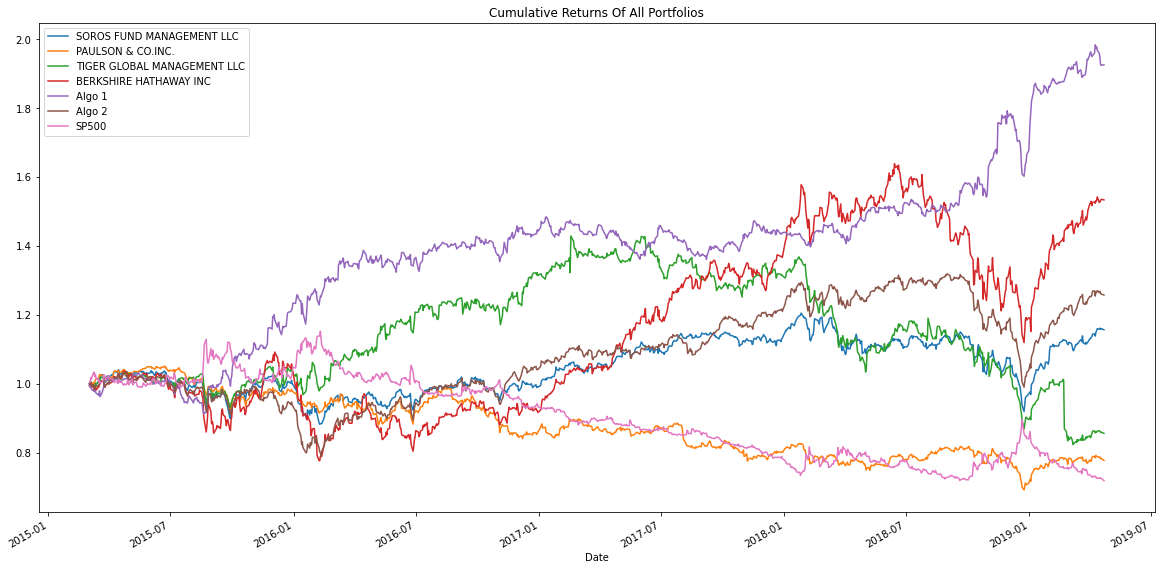

In [19]:
# Calculate cumulative returns of all portfolios
cumilative_returns = (1+returns).cumprod()
cumilative_returns.head()
# Plot cumulative returns
cumilative_returns.plot(figsize=(20,10), title='Cumulative Returns Of All Portfolios')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

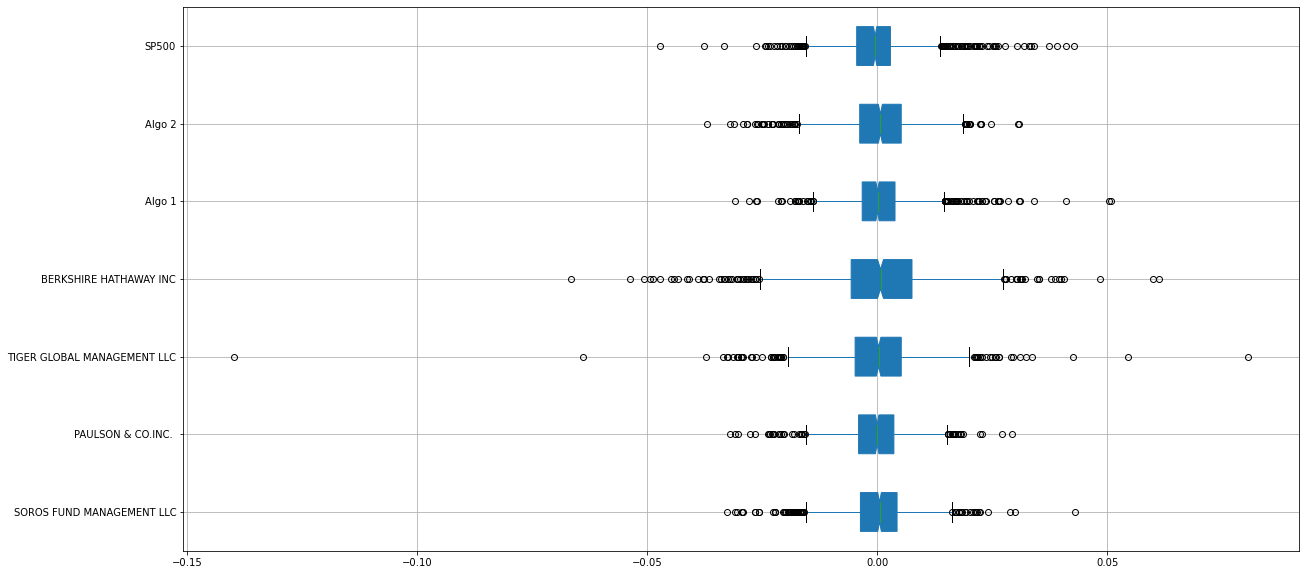

In [20]:
# Box plot to visually show risk
returns.boxplot(figsize=(20,10), patch_artist = True, notch=True, vert=0)

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
volatility = returns.std()
volatility

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500                          0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500
volatility.sort_values(inplace=True)
volatility

PAULSON & CO.INC.              0.007026
Algo 1                         0.007623
SOROS FUND MANAGEMENT LLC      0.007896
Algo 2                         0.008341
SP500                          0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = volatility*np.sqrt(252)
annualized_std

PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
SP500                          0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21 Days Standard Deviation For All Portfolios'}, xlabel='Date'>

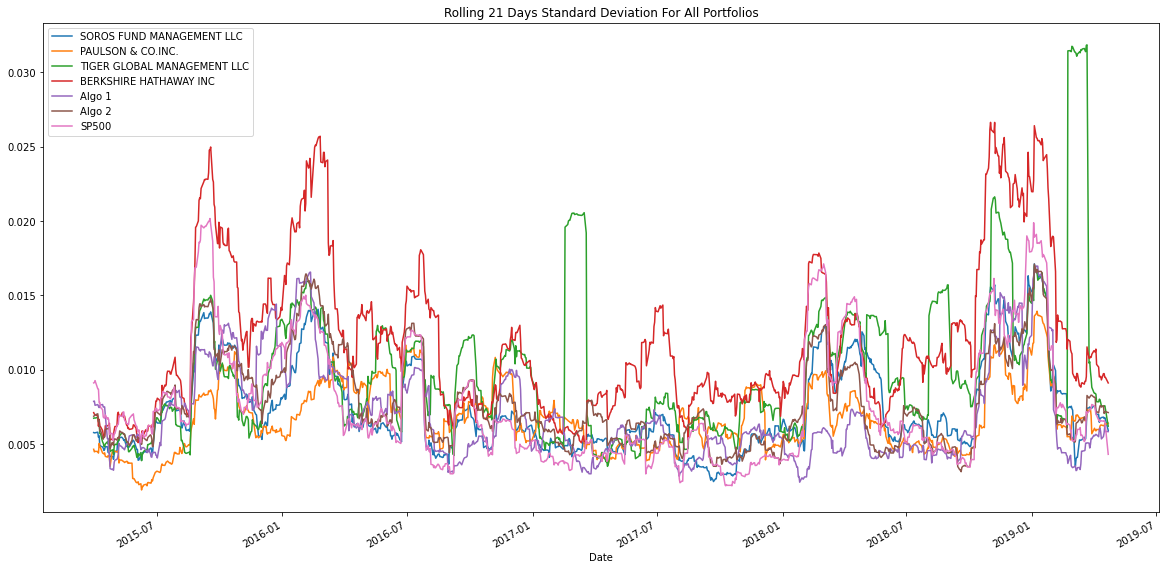

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
returns.rolling(window=21).std()
# Plot the rolling standard deviation
returns.rolling(window=21).std().plot(figsize=(20,10), title='Rolling 21 Days Standard Deviation For All Portfolios')

### Calculate and plot the correlation

<AxesSubplot:>

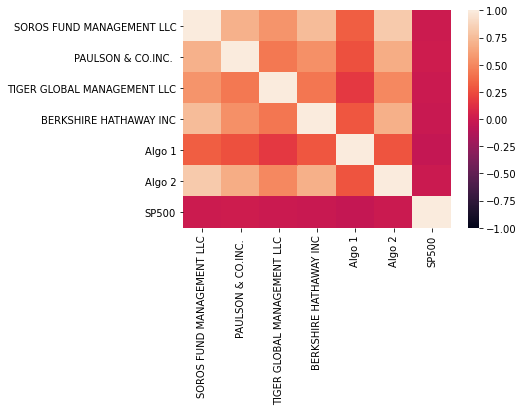

In [25]:
# Calculate the correlation
correlation = returns.corr()
# Display de correlation matrix
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

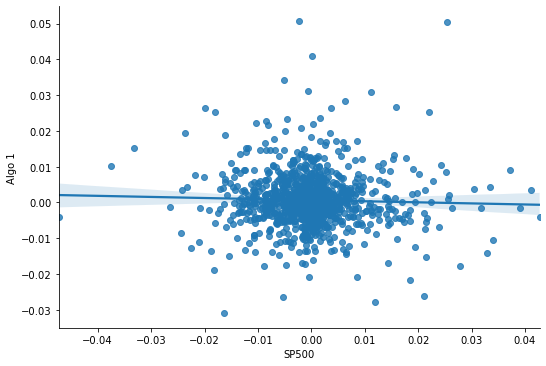

In [26]:
# Calculate covariance of a single portfolio
covariance = returns['Algo 1'].cov(returns['SP500'])

# Calculate variance of S&P 500
variance = returns['SP500'].var()

# Computing beta
beta = covariance/variance
beta
# Plot beta trend
sns.lmplot(x='SP500', y='Algo 1', data=returns, aspect=1.5, fit_reg=True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Algo 1 21-days halflife Exponentially Weighted Average'}, xlabel='Date'>

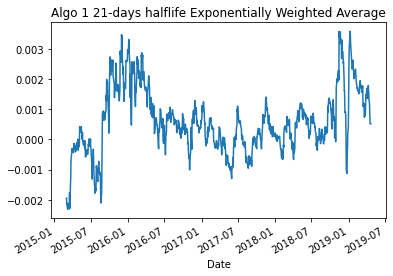

In [27]:
# Use `ewm` to calculate the rolling window
ewa = returns['Algo 1'].ewm(halflife=21, adjust=False).mean()
ewa.plot(title='Algo 1 21-days halflife Exponentially Weighted Average')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
sharpe_ratios = returns.mean() * 252 / annualized_std
sharpe_ratios.sort_values(ascending=False)

Algo 1                         1.369589
BERKSHIRE HATHAWAY INC         0.606743
Algo 2                         0.484334
SOROS FUND MANAGEMENT LLC      0.342894
TIGER GLOBAL MANAGEMENT LLC   -0.130186
PAULSON & CO.INC.             -0.491422
SP500                         -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

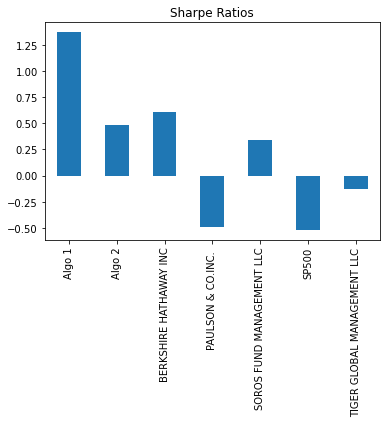

In [29]:
# Visualize the sharpe ratios as a bar plot
# The higher the sharpe ratio the better the investment
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

**Analysis of the market (S&P 500), the whales portfolios and algorithmic strategies for combined data of about 4 years:**

*Performance Analysis:*
Algo 1 shows highest cumulative returns as compared to S&P500 and whales portolios. 

*Risk Analysis:*
Tiger Global Management LLC and Berkshire Hathaway INC of the whales portfolio are more risker than the S&P 500 as compared to Harold's trading algorithms, as per both the daily and annualized standard deviations.

*Rolling statistics:*
The rolling statistics with 21 days window reflects Tiger Global Management LLC's short-term price fluctuations . However, Algo 1 was the least correlated portfolio as compared to the market (SP500). 

*Sharpe Ratios:*
Algorithmic stratergies overall outperforms both the market and the whales portfolios with highest sharpe ratio of Algo 1 portfolio (1.37 sharpe ratio). 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [30]:
# Reading data from 1st stock
csvpath = Path('../Resources/goog_historical.csv')
goog_df = pd.read_csv(csvpath)
goog_df.rename(columns={'Trade DATE':'Date', 'NOCP':'GOOG'}, inplace=True)
goog_df.set_index(pd.to_datetime(goog_df['Date'], infer_datetime_format=True), inplace=True)
goog_df.drop(columns=['Symbol', 'Date'], inplace=True)
goog_df.head()

,GOOG
Date,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [31]:
# Reading data from 2nd stock
csvpath = Path('../Resources/aapl_historical.csv')
aapl_df = pd.read_csv(csvpath)  
aapl_df.rename(columns={'Trade DATE':'Date', 'NOCP':'AAPL'}, inplace=True)
aapl_df.set_index(pd.to_datetime(aapl_df['Date'], infer_datetime_format=True), inplace=True)
aapl_df.drop(columns=['Symbol', 'Date'], inplace=True)
aapl_df.head()

,AAPL
Date,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [32]:
# Reading data from 3rd stock
csvpath = Path('../Resources/cost_historical.csv')
cost_df = pd.read_csv(csvpath)  
cost_df.rename(columns={'Trade DATE':'Date', 'NOCP':'COST'}, inplace=True)
cost_df.set_index(pd.to_datetime(cost_df['Date'], infer_datetime_format=True), inplace=True)
cost_df.drop(columns=['Symbol', 'Date'], inplace=True)
cost_df.head()

,COST
Date,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [33]:
# Combine all stocks in a single DataFrame
goog_aapl_cost = pd.concat([goog_df, aapl_df, cost_df], axis='columns', join='inner')
goog_aapl_cost.head()

,GOOG,AAPL,COST
Date,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [34]:
# Calculate daily returns
goog_aapl_cost_returns = goog_aapl_cost.pct_change()

# Drop NAs
goog_aapl_cost_returns = goog_aapl_cost_returns.dropna()

# Display sample data
goog_aapl_cost_returns.sample(5)

,GOOG,AAPL,COST
Date,,,
2018-05-25,0.014467,0.003619,0.008234
2018-10-03,0.029755,0.017896,0.006561
2018-05-17,0.011469,0.003650,0.003217
2018-05-31,-0.030826,-0.017714,0.005631
2018-12-12,0.001676,-0.010822,0.005695


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = pd.DataFrame({'GOOG_AAPL_COST': goog_aapl_cost_returns.dot(weights)})

# Display sample data
portfolio_returns

,GOOG_AAPL_COST
Date,
2019-05-08,0.001820
2019-05-07,0.000570
2019-05-06,0.019196
2019-05-03,0.004642
2019-05-02,-0.013131
...,...
2018-05-17,0.006112
2018-05-16,0.001618
2018-05-15,-0.009283


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([portfolio_returns, returns], axis='columns', join='inner')
all_returns.head()

,GOOG_AAPL_COST,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,,
2019-04-22,-0.011812,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764
2019-04-18,-0.001148,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-17,-0.001541,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-16,-0.009149,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-15,-0.000326,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns.isnull().sum()

GOOG_AAPL_COST                 0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500                          0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized `std`
annualized_std_1 = all_returns.std()*np.sqrt(252)
annualized_std_1.sort_values()

PAULSON & CO.INC.              0.116683
Algo 1                         0.133645
Algo 2                         0.139204
SOROS FUND MANAGEMENT LLC      0.146589
SP500                          0.152147
GOOG_AAPL_COST                 0.213137
TIGER GLOBAL MANAGEMENT LLC    0.232434
BERKSHIRE HATHAWAY INC         0.246819
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21 Days Standard Deviation For All Portfolios'}, xlabel='Date'>

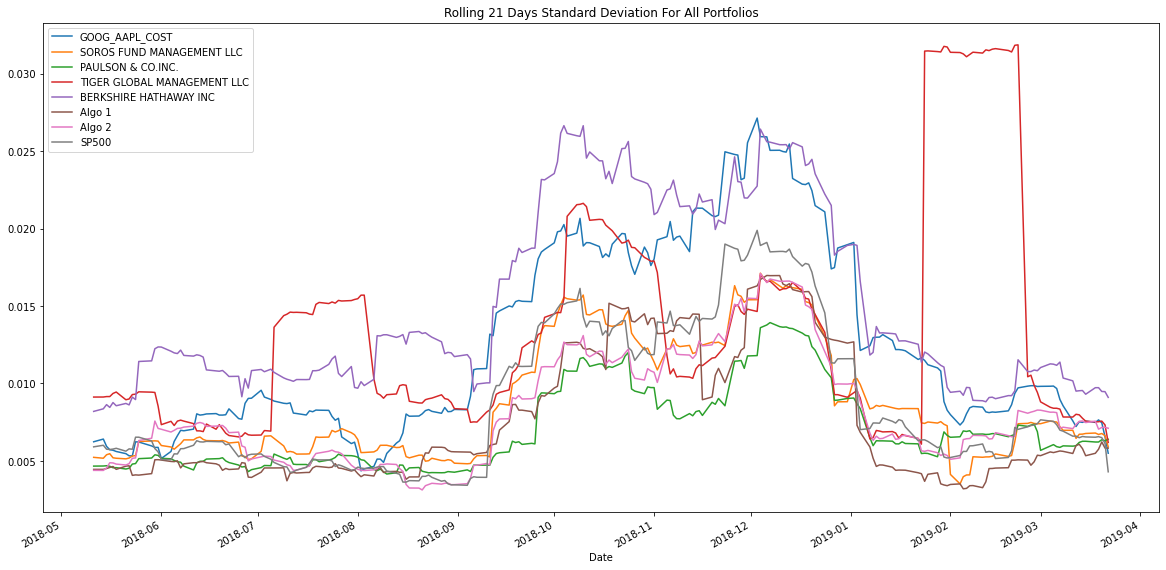

In [39]:
# Calculate rolling standard deviation
rolling_std = all_returns.rolling(window=21).std()

# Plot rolling standard deviation
rolling_std.plot(figsize=(20,10), title='Rolling 21 Days Standard Deviation For All Portfolios')

### Calculate and plot the correlation

<AxesSubplot:>

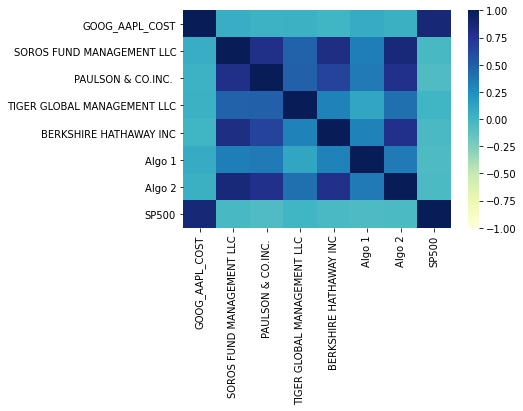

In [40]:
# Calculate and plot the correlation
correlation = all_returns.corr()
sns.heatmap(correlation, vmin=-1, vmax=1, cmap="YlGnBu")

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60 Day Beta of GOOG_AAPL_COST compared to SP500'}, xlabel='Date'>

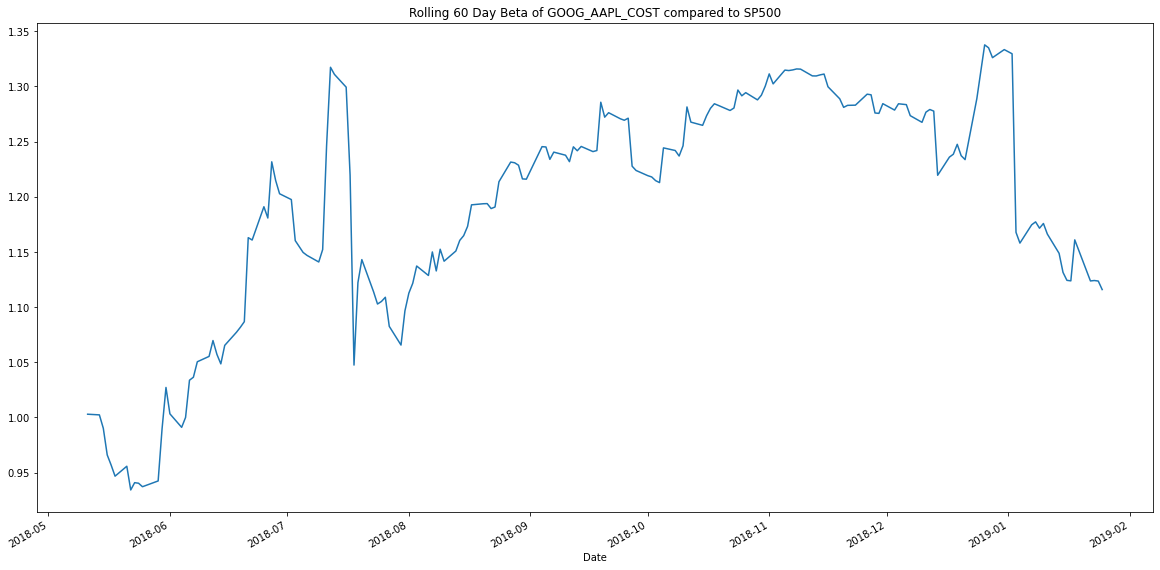

In [41]:
# Calculate and plot Beta
rolling_covariance = all_returns['GOOG_AAPL_COST'].rolling(window=60).cov(all_returns['SP500'])
rolling_variance = all_returns['SP500'].rolling(window=60).var()
rolling_beta = rolling_covariance/rolling_variance
rolling_beta.plot(figsize=(20,10), title='Rolling 60 Day Beta of GOOG_AAPL_COST compared to SP500')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [42]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_1 = (all_returns.mean()*252)/annualized_std_1
sharpe_ratios_1.sort_values(ascending=False)

Algo 1                         1.999866
SOROS FUND MANAGEMENT LLC      0.344766
PAULSON & CO.INC.              0.236041
BERKSHIRE HATHAWAY INC         0.085005
Algo 2                         0.009467
SP500                         -0.432942
GOOG_AAPL_COST                -0.613547
TIGER GLOBAL MANAGEMENT LLC   -1.052249
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

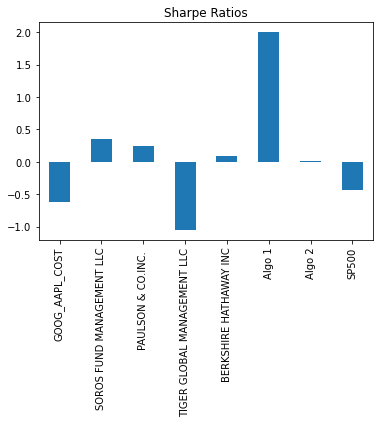

In [43]:
# Visualize the sharpe ratios as a bar plot
# The higher the sharpe ratio the better the investment
sharpe_ratios_1.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

**Analysis of the market (S&P 500), the whales portfolios, algorithmic strategies and goog-aapl-cost portfolio for combined data of about 1 year:**
 
*Risk Analysis:*
Goog-aapl-cost portfolio along with Tiger Global Management LLC and Berkshire Hathaway INC of the whales portfolio are more risker than the S&P 500 as compared to Harold's trading algorithms, as per annualized standard deviations. However, Paulson & Co.INC of the whales portfolio has the least amount of risk.

*Rolling statistics:*
All portfolios especially goog-appl-cost appears extremely corelated to S&P 500. The rolling 60 days beta for goog-aapl-cost has mostly remained greater than 1 which indicates the portfolio is more volatile and moves with the market. 

*Sharpe Ratios:*
Again Algorithmic stratergies overall outperforms both the market, the whales portfolios and the goog-aapl-cost portfolio with magnificent sharpe ratio of Algo 1 portfolio (2.0 sharpe ratio). Whereas the goog-aapl-cost portfolio show negative sharpe ratio of -0.61. 

*Algorthmic trading portfolios are better investment for Harold.* 